<a href="https://colab.research.google.com/github/JuliaJueun/ml-cc101/blob/main/Dacon_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 정형데이터 대회는 AutoML에 때려박고(?) 시작하자!

이번 코드에서는 AutoML 패키지인 PyCaret을 활용하여 정형데이터 대회에 참여하는 과정을 알아보겠습니다. Feature engineering, model tuning 없이 주어진 데이터를 그대로 활용하여 default 모델을 훈련하고 예측 했으므로, 추가 작업을 통해 높은 성능을 보여줄 수 있을 것 같습니다. 

개인적으로 PyCaret은 아직까지 single output인 문제에는 적합한데 multi output 문제에는 부적합한것 같습니다. 혹시 multi output 문제에도 잘 적용된다면 알려주세요!

In this kernel we will use an AutoML package called PyCaret to enter data science competitions with structured data. I've used the given data without any feature engineering and trained the models without model tuning, so I expect better scores if we engineer additional feature and tune the models. 

I think PyCaret is approporiate for single output prediction tasks, but I still haven't figured out easier way to implement it on multi output prediction tasks. Would appreciate it if anyone could share tutorial code on applying PyCaret on multi output prediction task. 

## 경로 설정 (Define your path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/My Drive/nocode-ai/open data/'

In [ ]:
import os
os.listdir(path)

['test_x.csv', 'train.csv', 'sample_submission.csv']

## 데이터 불러오기 (Read Data)

In [ ]:
import pandas as pd
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test_x.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

## 데이터 구조 확인 (Checking the shapes of data)

In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)

(45532, 78)
(11383, 77)
(11383, 2)


## PyCaret 패키지 설치 (Install PyCaret)

In [ ]:
!pip install pycaret

## 분류 작업에 필용한 함수 불러오기 (Import methods for classification task)

In [ ]:
from pycaret.classification import *

## 실험 환경 구축 (Setup the environment)

- PyCaret에서는 모델 학습 전 실험 환경을 구축 해주어야 합니다. setup 함수를 통해 환경을 구축할 수 있습니다. 
- setup 단계에서는 PyCaret이 자동으로 컬럼 형태를 인식합니다. 그 후 사용자에게 제대로 인식되었는지 확인을 받게 됩니다. 그 때 enter를 눌러주시면 됩니다. 
- 또한 주어진 데이터의 얼마를 사용하여 train / validation을 구축할지 묻게 되는데, 전체 데이터를 사용하고 싶다면 enter 눌러주시면 됩니다. 
----

- In PyCaret you have to setup the environment before experimenting with the models. It can be done by using 'setup' method. 
- In setup stage, PyCaret automatically interprets column types of the given data and asks the user if it has intepreted it correctly. You can customize whether you want each columns to be interpreted differently by using the parameters in setup method. In this tutorial we will just go with the automatic interpretation by pressing 'enter'. 
- Also, it asks the ratio of dataset used to contruct train/validation sets. We will use 100% of the dataset so just press 'enter' again. 

In [ ]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = train, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,1163
1,Target Type,Binary
2,Label Encoded,"1: 0, 2: 1"
3,Original Data,"(45532, 78)"
4,Missing Values,False
5,Numeric Features,42
6,Categorical Features,35
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
train.head(100)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1.0,459,4.0,1342,5.0,1352,1.0,2110,1.0,1519,1.0,1508,4.0,2574,5.0,1632,1.0,2852,5.0,5881,5.0,3796,1.0,1155,5.0,980,2.0,1103,5.0,699,5.0,1733,2.0,1220,2.0,12720,3.0,663,3.0,6018,20s,2,2,3,Male,1,2,White,Christian_Catholic,5,1,6,6,2,0,1,0,0,4,3,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0
96,96,1.0,561,1.0,2176,5.0,975,1.0,668,2.0,1311,1.0,622,2.0,1143,5.0,3028,2.0,1831,4.0,814,2.0,1744,5.0,958,4.0,1874,1.0,555,5.0,1489,5.0,1394,1.0,406,2.0,1076,5.0,875,5.0,717,30s,3,2,4,Male,1,2,White,Atheist,7,7,7,7,7,7,7,7,7,7,3,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1
97,97,3.0,669,1.0,2098,4.0,417,3.0,3105,5.0,2728,4.0,990,5.0,537,1.0,2375,4.0,3983,1.0,2058,5.0,1940,4.0,2537,1.0,1725,5.0,581,4.0,2783,2.0,1155,5.0,1112,5.0,1015,3.0,752,1.0,2467,20s,3,1,1,Male,1,1,White,Christian_Protestant,5,6,0,6,0,0,2,3,0,0,2,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1
98,98,1.0,479,2.0,700,2.0,1430,1.0,780,2.0,1279,2.0,954,2.0,976,1.0,1272,4.0,1089,4.0,902,4.0,1869,5.0,1087,1.0,811,2.0,728,2.0,762,2.0,1205,3.0,8299,3.0,295046,5.0,1000,4.0,953,30s,4,1,2,Female,0,2,White,Other,1,2,2,1,0,5,2,2,5,2,3,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1


In [ ]:
train['race'].describe()

count     45532
unique        7
top       White
freq      31248
Name: race, dtype: object

In [ ]:
train['religion'].describe()

count       45532
unique         12
top       Atheist
freq        10192
Name: religion, dtype: object

## 모델 학습 및 비교 (Train models and compare)

- 환경 구축을 했으니 PyCaret에서 제공하는 기본 모델에 대해 학습하고 비교해보겠습니다.
- compared_models 함수를 통해 15개의 기본 모델을 학습하고 성능을 비교할 수 있습니다. 
- AUC 기준으로 성능이 가장 좋은 3개의 모델을 추려내어 저장해보겠습니다. 본 대회 평가지표가 AUC이기 때문에 AUC 기준으로 모델을 선정합니다.
-----
- Now we have constructed the environment, we will now train and compare the default models provided in PyCaret
- By using 'compare_models' method we can easily train and compare 15 default models provided in the package
- We will select top 3 models in terms of AUC, that is because the evaluation metric for this competition is AUC

In [ ]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6932,0.7632,0.6362,0.7634,0.6940,0.3915,0.3981,27.7906
1,Extreme Gradient Boosting,0.6909,0.7631,0.6403,0.7571,0.6938,0.3861,0.3918,11.4439
2,CatBoost Classifier,0.6925,0.7629,0.6539,0.7515,0.6992,0.3877,0.3917,26.0743
3,Light Gradient Boosting Machine,0.6920,0.7622,0.6416,0.7582,0.6950,0.3884,0.3939,1.5087
4,Linear Discriminant Analysis,0.6907,0.7599,0.6579,0.7466,0.6993,0.3835,0.3869,1.4763
5,Extra Trees Classifier,0.6894,0.7595,0.6428,0.7532,0.6935,0.3826,0.3876,6.7204
6,Ada Boost Classifier,0.6897,0.7562,0.6511,0.7487,0.6964,0.3822,0.3861,6.3330
7,Random Forest Classifier,0.6578,0.7121,0.6076,0.7224,0.6600,0.3206,0.3255,0.8297
8,Decision Tree Classifier,0.6140,0.6101,0.6514,0.6458,0.6485,0.2204,0.2204,1.8139
9,Naive Bayes,0.4537,0.5162,0.0111,0.5164,0.0218,-0.0011,-0.0062,0.1002


- CatBoost Classfier, Gradient Boosting Classifer, LGBM이 가장 좋은 3개의 모델입니다. 해당 모델은 best_3 변수에 저장되어 있습니다. 
- CatBoost Classfier, Gradient Boosting Classifer, and LGBM are the best 3 models. Those models are now stored in best_3 variable. 

## 모델 앙상블 (Model Ensemble)

- 학습된 3개의 모델을 앙상블 시키도록 하겠습니다. 본 대회는 score 최적화를 위해 확률 값을 예측해야 하므로 soft vote ensemble을 진행하겠습니다. 
------
- We will now ensemble the three models. In order to optimize the score for this competition we have to predict probabilities, we we will soft-vote ensemble the three models using 'blend_models' method. 

In [ ]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6985,0.7716,0.6569,0.7593,0.7044,0.4000,0.4044
1,0.6907,0.7607,0.6388,0.7575,0.6931,0.3858,0.3915
2,0.6895,0.7603,0.6428,0.7532,0.6936,0.3829,0.3879
3,0.6961,0.7677,0.6568,0.7554,0.7027,0.3950,0.3991
4,0.6939,0.7664,0.6374,0.7638,0.6949,0.3928,0.3993
Mean,0.6937,0.7654,0.6465,0.7578,0.6977,0.3913,0.3964
SD,0.0033,0.0043,0.0086,0.0036,0.0048,0.0062,0.0059


## 모델 예측 (Prediction)
- 구축된 앙상블 모델을 통해 예측을 해보겠습니다. 
- setup 환경에 이미 hold-out set이 존재하므로 해당 데이터에 대해 예측을 하여 모델 성능을 확인하겠습니다. 

----
- We will use the ensembled model on predicting unseen data.
- There is already a hold-out set constucted on our environment so we will test on it to evaluate the performance.

In [ ]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7001,0.7725,0.6471,0.7679,0.7024,0.4045,0.4105


- AUC가 0.7725로 꽤 준수한 성능을 보이는 것을 알 수 있습니다. 
- We got a pretty decent model with AUC of 0.7725

## 전체 데이터에 대한 재학습 (Re-training the model on whole data)

- 현재까지 실험은 주어진 train 데이터를 다시 한 번 train / validation으로 나눠서 실험을 한 것이므로, 전체 train 데이터에 학습되어 있지 않습니다. 
- 최적의 성능을 위해 전체 데이터에 학습을 시켜주도록 하겠습니다. 

------
- Until now we have splitted the given train data into another train / validation sets to experiment. So the models are not trained on the full training data set.
- We will train the model on the whole dataset for the most optimal performance. 

In [ ]:
final_model = finalize_model(blended)

## 대회용 test set에 대한 예측 (Predicting on test set for the competition)

- predict_model 함수를 통해 재학습된 모델을 대회용 test set에 대해 예측해보겠습니다. 
- We will now use the re-trained model on the test set for the competition

In [ ]:
predictions = predict_model(final_model, data = test)

In [ ]:
predictions

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Label,Score
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,0,1,0,1,0,1,1,2,0.6475
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,2,0.8857
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,1,0,1,0,1,1,2,0.5256
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,0.1998
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,0,1,1,0,1,1,1,1,2,0.7567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,0,1,1,0,1,0,1,1,1,0.3924
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,2,0.8792
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,0,1,1,0,1,0,1,1,1,0.2230
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,0,1,1,0,1,1,1,0,1,0.3271


- 확률 값이 'Score' 컬럼에 저장되어 있으므로 해당 값을 submission 파일에 옮겨 데이콘에 제출하겠습니다. 
- The probability values are stored on 'Score' column. So we will write them on our submission format and submit on DACON.

In [ ]:
submission['voted'] = predictions['Score']

In [ ]:
submission.to_csv('submission_proba.csv', index = False)

- 아마 0.77 정도의 성능을 보일 것이며 추가 작업을 통해 성능을 더 향상시킬 수 있을거라 기대합니다. 
- You will probabily get around 0.77 AUC and with additional steps I think we can improve this score. 

Importing Package and Data

In [ ]:
import pandas as pd
import seaborn as sns

from IPython.display import Image

In [ ]:
data = pd.read_csv(path + "train.csv", index_col = 0)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

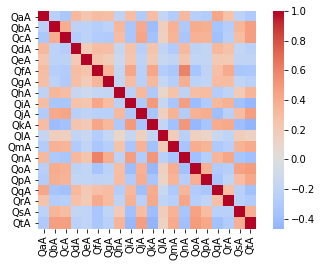

In [ ]:
correlations = data[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap='coolwarm', square=True, center = 0)

위 히트맵에서 볼 수 있듯이, 부호가 같은 문항끼리는 (예를 들어 QbA와 QcA는) Correlation값이 양수이고, 부호가 다른 문항끼리는 (QbA, QeA) correlation값이 음수이다. 

In [ ]:
for col in data[Answers]:
  print(sorted(data[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


모든 문항의 답변이 1,2,3,4,5로 되어있기 때문에 답변 값을 reverse 시키기 위해서는 단순히 6에서 답변값을 빼주면 된다.

In [ ]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns:
  data[flip] = 6 - data[flip]


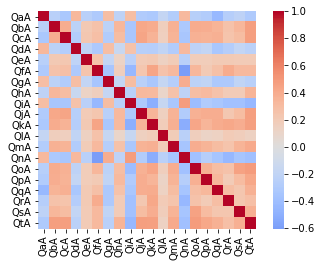

In [ ]:
correlations = data[Answers].corr(method = "spearman")
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

#전보다 빨간색 타일 수가 늘어났다. Secret이 아닌 문항들간의 관계를 살펴보았을 때 
#모두가 양수 correlation을 나타내는 붉은색을 띠는 것을 볼 수 있다.

#그리고 5개의 파란줄이 눈에 띈다. 이는 -부호를 가진 Secret 문항 수와 일치한다.
#이를 통해 QaA, QdA, QgA, QiA, QnA 이렇게 다섯문항이 -부호를 가진 문항이라는 걸 알 수 있다.

In [ ]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns:
  data[flip] = 6 - data[flip]

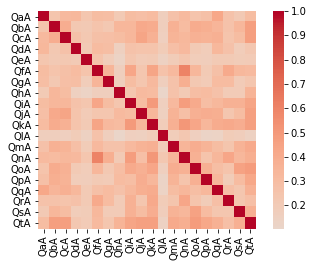

In [ ]:
correlations = data[Answers].corr(method="spearman")
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [ ]:
data['Mach_score'] = data[Answers].mean(axis=1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.95
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,2.60
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,1.90
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,3.35
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,3.00


In [ ]:
data = pd.DataFrame(data)
data.to_csv(r'C:\Users\jueunjuliajo\Desktop\nocode-ai\train_new', index = False, header = True)
print(data)

       QaA   QaE  QbA   QbE  QcA  ...  wr_10  wr_11  wr_12  wr_13  Mach_score
index                             ...                                        
0      3.0   363  4.0  1370  5.0  ...      1      0      1      1        2.95
1      1.0   647  5.0  1313  3.0  ...      1      0      1      1        2.60
2      2.0  1623  1.0  1480  1.0  ...      1      0      1      1        1.90
3      3.0   504  3.0  2311  4.0  ...      1      0      1      1        3.35
4      5.0   927  1.0   707  5.0  ...      1      1      1      1        3.00
...    ...   ...  ...   ...  ...  ...    ...    ...    ...    ...         ...
45527  4.0  1050  5.0   619  4.0  ...      1      0      1      1        4.15
45528  4.0   581  3.0  1353  4.0  ...      1      0      1      1        3.80
45529  2.0   593  1.0   857  1.0  ...      1      0      1      1        1.50
45530  5.0   747  3.0  1331  4.0  ...      1      0      1      1        2.90
45531  3.0   496  5.0  1827  5.0  ...      1      0      1      

In [ ]:
from google.colab import files
files.download('train_new.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>